### DEALIING WITH BIPARTITE GRAPH

<br>

In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [2]:
data=pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [3]:
data.head(2)

,movie,actor
0,m1,a1
1,m2,a1


In [4]:
edges = [tuple(x) for x in data.values.tolist()]

In [5]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [6]:
A = list(nx.connected_component_subgraphs(B))[0]

In [7]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


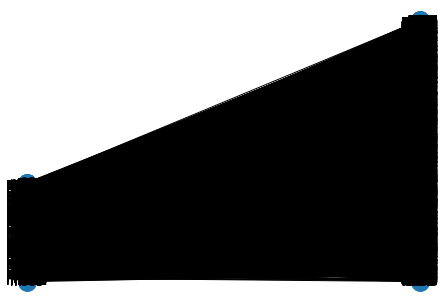

In [8]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [9]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [10]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [11]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [12]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4702, 128)

In [13]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]

In [14]:
print(node_ids)

['a973', 'a967', 'a964', 'a1731', 'a970', 'a965', 'a1003', 'a1028', 'a969', 'a1057', 'm1111', 'm1094', 'm67', 'a966', 'a959', 'a988', 'm1100', 'a49', 'a962', 'a1037', 'a93', 'a971', 'a963', 'a1076', 'a960', 'a977', 'a1030', 'm1095', 'a1016', 'a204', 'a1027', 'a472', 'a768', 'a968', 'a631', 'a1004', 'a2715', 'a1035', 'a1020', 'a1026', 'm1001', 'a407', 'm1114', 'a1507', 'a1031', 'a306', 'a972', 'a138', 'm1112', 'a975', 'm1261', 'm1113', 'm1097', 'm126', 'a1036', 'm1096', 'm1022', 'm376', 'a1008', 'a1435', 'a921', 'a987', 'a1467', 'm1232', 'm987', 'a1015', 'a205', 'm1220', 'a1021', 'm121', 'm453', 'm964', 'a1038', 'm154', 'm148', 'a976', 'm1000', 'a1011', 'm122', 'm26', 'a782', 'm1106', 'm25', 'm1357', 'm1116', 'm990', 'm165', 'm796', 'a1060', 'm1101', 'm816', 'm1272', 'a974', 'a1005', 'm988', 'm1011', 'm1023', 'm983', 'm1092', 'a1436', 'm32', 'm147', 'm125', 'm1045', 'm1090', 'm127', 'm150', 'm616', 'm115', 'a228', 'm1024', 'm1029', 'm1213', 'm155', 'm1348', 'm914', 'm915', 'm1138', 'm91

In [15]:
print(node_embeddings)

[[-0.7342718   0.20450968  1.9425089  ... -1.522517    0.83702874
  -0.48707992]
 [-0.24157912  1.0812001   2.7304742  ... -0.16254145 -0.1951515
  -0.26404512]
 [-0.65439695  0.27983078  1.8356581  ... -1.3810763   0.4163927
   0.08487076]
 ...
 [ 0.11859829  0.01760467 -0.09376556 ... -0.02223773  0.01755736
   0.09564989]
 [-0.05827657 -0.0124102   0.06166453 ...  0.03031465 -0.02239894
  -0.01606467]
 [ 0.08923556 -0.02842243 -0.03255522 ...  0.04459018  0.05364773
   0.00682614]]


In [16]:
node_embeddings.shape

(4702, 128)

In [17]:
print(node_targets)

['actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'movie', 'movie', 'movie', 'actor', 'actor', 'actor', 'movie', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'movie', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'movie', 'actor', 'movie', 'actor', 'actor', 'actor', 'actor', 'actor', 'movie', 'actor', 'movie', 'movie', 'movie', 'movie', 'actor', 'movie', 'movie', 'movie', 'actor', 'actor', 'actor', 'actor', 'actor', 'movie', 'movie', 'actor', 'actor', 'movie', 'actor', 'movie', 'movie', 'movie', 'actor', 'movie', 'movie', 'actor', 'movie', 'actor', 'movie', 'movie', 'actor', 'movie', 'movie', 'movie', 'movie', 'movie', 'movie', 'movie', 'actor', 'movie', 'movie', 'movie', 'actor', 'actor', 'movie', 'movie', 'movie', 'movie', 'movie', 'actor', 'movie', 'movie', 'movie', 'movie', 'movie', 'movie', 'movie', 'movie', 'movie', 'actor', 'movie', 

In [18]:
len(node_targets)

4702

In [19]:
print(len(node_targets))

4702


C:\Users\Simran\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


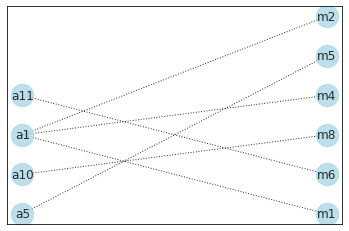

In [1]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)